<a href="https://colab.research.google.com/github/ANDUYONG/KnnProgram/blob/main/knn_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
붓꽃 분류(Iris Classification)

목표
  - Scikit-learn 라이브러리의 표준 사용법 익히기(모델 불러오기, 훈련, 예측)
  - 데이터 탐색 및 시각화(EDA)를 통해 데이터의 특징 파악
  - 기본적인 분류 알고리즘(예: KNN, 로지스틱 회귀) 적용 및 성능 평가
"""

'\n붓꽃 분류(Iris Classification)\n\n목표\n  - Scikit-learn 라이브러리의 표준 사용법 익히기(모델 불러오기, 훈련, 예측)\n  - 데이터 탐색 및 시각화(EDA)를 통해 데이터의 특징 파악\n  - 기본적인 분류 알고리즘(예: KNN, 로지스틱 회귀) 적용 및 성능 평가\n'

In [7]:
"""
1단계: 환경 설정 및 데이터 로드
  1) 데이터 로드: Iris 데이터 셋은 Scikit-learn 라이브러리에서 제공
"""

import pandas as pd
from sklearn.datasets import load_iris

# 1) 데이터 로드
iris = load_iris(as_frame=True)

# 피처(X)와 타겟(Y)을 Dataframe으로 분리
df = iris.frame
X = df.drop(columns=['target'])
Y = df['target']

print(df.head())
print(df.info())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]


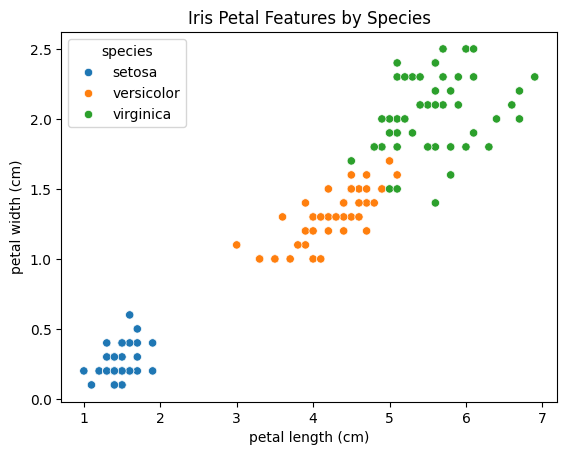

In [10]:
"""
2단계: 데이터 탐색 및 전처리(EDA)
  1) 기초 통계 확인
  2) 특징 간 관계 시각화: 가장 중요한 EDA 단계
    - seaborn 라이브러리를 사용, 두 변수(예: 꽃잎 길이, 꽃받침 길이)간의 관계를 타겟(품종)별로 색을 구분하여 시각화 합니다.
"""

# 1) 기초 통계 확인
print(df.describe())

# 2) 특징 간 관계 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 타겟(target)을 품종 이름으로 변환하여 시각화에 사용
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 두 변수 간의 관계 시각화 (예시: 꽃잎 길이와 너비)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df)
plt.title('Iris Petal Features by Species')
plt.show()

In [11]:
"""
3단계: 훈련/테스트 데이터 분할
"""

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (105, 4)
X_test shape: (45, 4)


In [12]:
"""
4단계: 모델 구축 및 훈련(KNN)
  - 가장 간단하고 직관적인 분류 알고리즘인 **K-최근점 이웃(K-Nearest Neighbors, KNN)**을 사용
1) 모델 불러오기
2) 모델 훈련
3) 예측
"""

# 1) 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 객체 생성 (K=5 설정)
knn_model = KNeighborsClassifier(n_neighbors=5)

# 2) 모델 훈련
knn_model.fit(X_train, Y_train)

# 3) 예측
Y_pred = knn_model.predict(X_test)

모델 정확도(Accuracy): 0.9778
혼동 행렬(Confusion Matrix): [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


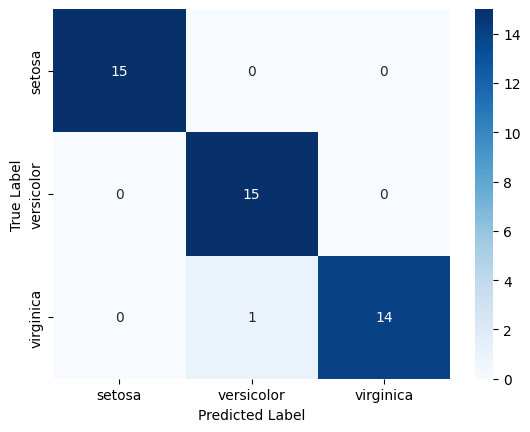

In [13]:
"""
5단계 모델 평가 및 분석
  - 모델이 얼마나 잘 분류했는지 평가 지표를 통해 확인
1) 정확도(Accuracy) 계산
2) 혼동 행렬(Confusion Matrix) 확인
"""

from sklearn.metrics import accuracy_score, confusion_matrix

# 1) 정확도 계산
accuracy = accuracy_score(Y_test, Y_pred)
print(f"모델 정확도(Accuracy): {accuracy:.4f}")

# 2) 혼동 행렬 확인
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"혼동 행렬(Confusion Matrix): {conf_matrix}")

# 시각화
sns.heatmap(
    conf_matrix, annot=True, fmt='d', cmap='Blues',
    xticklabels=iris.target_names, yticklabels=iris.target_names
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()